In [1]:
import os
import numpy as np
import json
import glob

In [2]:
filelocation = os.path.join('LiH', 'qed_fci', 'bond_stretch_50_points', '*.json')
filenames = glob.glob(filelocation)
print(filenames[0])
f = open(filenames[0])
data = json.load(f)
coords = data["molecule"]["geometry"]
bl = data["bond_length"]
print((coords[1][2]-coords[0][2]) * 0.529177)
print(bl)




LiH/qed_fci/bond_stretch_50_points/LiH_r_1.841_qed-fci_sto-3g_number_basis_10_lambda_0.0_0.0_0.05_omega_0.12086.json
1.8408155936857964
1.8408163265306123


In [3]:
# array of bondlengths - 50
r_array = np.linspace(1.4, 2.2, 50)

# energy array - 10 different photon bases, 7 different electronic states, 50 different geometries
e_array = np.zeros((11, 7, 50))

In [4]:
r_vals = []
energy_vals = []
for file in filenames:
    f = open(file)
    data = json.load(f)
    
    # get the bondlength
    r_curr = data["bond_length"]
    
    # figure out which bondlength index this corresponds to
    r_idx = np.abs(r_array - r_curr).argmin()
    
    # get the photon number - this number is also the corresponding photon index
    ph_idx = data["model"]["number_of_photon_states"]
    
    eigs = data["return_result"]
    
    e_array[ph_idx, :, r_idx] = np.array(eigs)


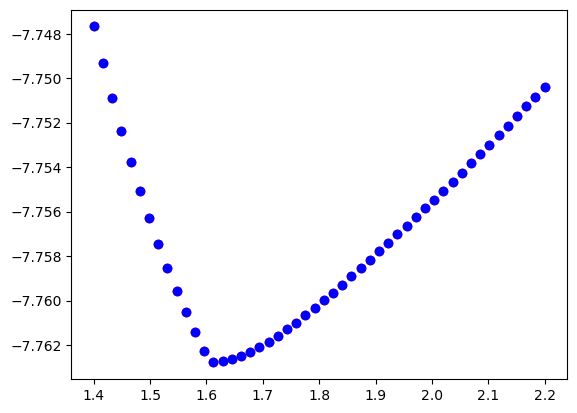

In [8]:
from matplotlib import pyplot as plt
plt.plot(r_array, e_array[10,2,:], 'ro')
plt.plot(r_array, e_array[9,2,:], 'bo')
plt.show()